In [ ]:
pip install scikit-learn


In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


In [2]:
Categories=['healthy','mas','str', 'tlv', 'xnotvalx'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir='D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/FINAL/SVM/data'
#path which contains all the categories of images 
for i in Categories: 
	
	print(f'loading... category : {i}') 
	path=os.path.join(datadir,i) 
	for img in os.listdir(path): 
		img_array=imread(os.path.join(path,img)) 
		img_resized=resize(img_array,(150,150,3)) 
		flat_data_arr.append(img_resized.flatten()) 
		target_arr.append(Categories.index(i)) 
	print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : healthy
loaded category:healthy successfully
loading... category : mas
loaded category:mas successfully
loading... category : str
loaded category:str successfully
loading... category : tlv
loaded category:tlv successfully
loading... category : xnotvalx
loaded category:xnotvalx successfully


In [3]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape


(3094, 67501)

In [4]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]


In [5]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
											random_state=77, 
											stratify=y) 


WITH PARAMETERS

In [7]:
from sklearn.svm import SVC
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[1,10], 
			'gamma':[0.01,0.1], 
			'kernel':['rbf']} 

# Creating a support vector classifier 
my_model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


WITHOUT PARAMETER

In [ ]:
from sklearn.svm import SVC
my_model = SVC(probability=True)


In [8]:
# Training the model using the training data 
my_model.fit(x_train,y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.665 total time= 8.8min
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.681 total time= 7.3min
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.701 total time= 6.9min
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.624 total time= 7.0min
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.655 total time= 6.5min
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.384 total time= 7.2min
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.412 total time= 7.1min
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.434 total time= 6.7min
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.384 total time= 7.4min
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.378 total time= 7.3min
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.693 total time= 7.4min
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [9]:
# Testing the model using the testing data 
y_pred = my_model.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")


The model is 72.6978998384491% accurate


In [10]:
print(classification_report(y_test, y_pred, target_names=['healthy','mas','str', 'tlv', 'xnotvalx']))


              precision    recall  f1-score   support

     healthy       1.00      0.72      0.84       129
         mas       1.00      0.60      0.75       121
         str       1.00      0.67      0.80       120
         tlv       1.00      0.62      0.77       119
    xnotvalx       0.43      1.00      0.61       130

    accuracy                           0.73       619
   macro avg       0.89      0.72      0.75       619
weighted avg       0.88      0.73      0.75       619



In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.7269789983844911


In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 93   0   0   0  36]
 [  0  73   0   0  48]
 [  0   0  80   0  40]
 [  0   0   0  74  45]
 [  0   0   0   0 130]]


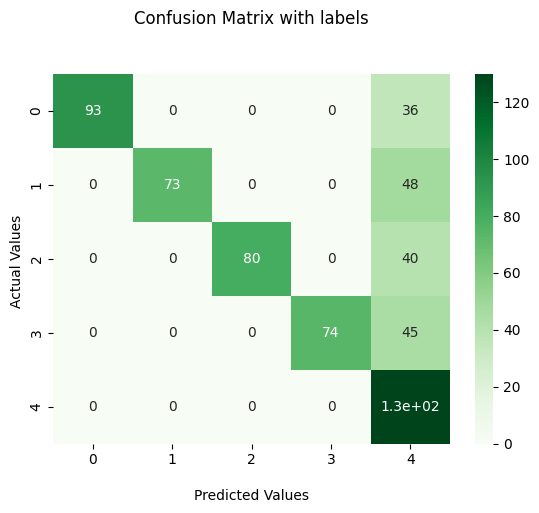

In [15]:
import seaborn as sns
# confusion matrix
cfm_val = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cfm_val, annot=True,
            cmap='Greens')

# Preparation for plotting confusion matrix
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

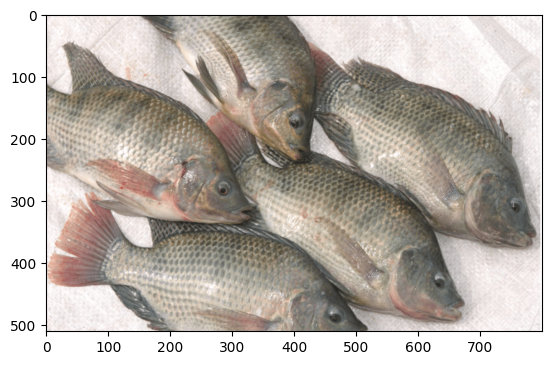

AttributeError: This 'GridSearchCV' has no attribute 'predict_proba'

In [20]:
path='D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/data/healthy.png'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=my_model.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[my_model.predict(l)[0]])

In [21]:
from pathlib import Path
my_model.model_dir = "D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/FINAL/SVM"
my_model.save('my_model.h5')

AttributeError: 'GridSearchCV' object has no attribute 'save'

In [ ]:
import tensorflow as tf

# Load your trained EfficientNet model
model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Simulation/FINAL/DenseNet169')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Optionally, optimize the model (e.g., apply quantization)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)
